5. Neural Networks
SHAILJA PATIL
24CS60R49

In [2]:
import pandas as pd
df =pd.read_csv('test.csv')
print(df.head())


                                               tweet label
0  The CDC currently reports 99031 deaths. In gen...  real
1  States reported 1121 deaths a small rise from ...  real
2  Politically Correct Woman (Almost) Uses Pandem...  fake
3  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4  Populous states can generate large case counts...  real


DATA PRE-PROCESSING DONE ALREADY IN PART 1 AND OBTAINED 3 FILES , WE ARE DIRECTLY GOING TO USE

data split : train_split.csv test_split.csv val_split.csv GENERATED FROM PART1

TF-IDF VECTORIZATION

In [3]:
# Import the necessary libraries for TF-IDF VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
train_data = pd.read_csv('train_split.csv')
val_data = pd.read_csv('val_split.csv')
test_data = pd.read_csv('test_split.csv')
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  #  max_features set to 5000

# Fit and transform the training data to obtain TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text'])

# Transform the validation and test data using the same fitted vectorizer
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text'])

# Optionally, check the shape of the transformed data
print(f"TF-IDF Training Data Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Validation Data Shape: {X_val_tfidf.shape}")
print(f"TF-IDF Test Data Shape: {X_test_tfidf.shape}")

TF-IDF Training Data Shape: (8480, 5000)
TF-IDF Validation Data Shape: (1060, 5000)
TF-IDF Test Data Shape: (1060, 5000)


NEURAL NETWORK

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [7]:
y_train = train_data['label']  # Assuming 'label' is the column with 0: fake, 1: real
y_val = val_data['label']
y_test = test_data['label']

# Initialize Neural Network model
nn_model = MLPClassifier(max_iter=300)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Reduce layer configurations
    'activation': ['relu'],  # Fix activation function for speed
    'solver': ['adam'],  # Use a single solver
    'alpha': [0.0001, 0.001]  # Reduce regularization options
}

# Perform RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(nn_model, param_grid, n_iter=3, cv=2, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_tfidf, y_train)

# Best model
best_nn = random_search.best_estimator_

# Predictions
y_pred = best_nn.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Neural Network Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Neural Network Accuracy: 0.9057
              precision    recall  f1-score   support

        fake       0.92      0.88      0.90       496
        real       0.90      0.93      0.91       564

    accuracy                           0.91      1060
   macro avg       0.91      0.90      0.91      1060
weighted avg       0.91      0.91      0.91      1060



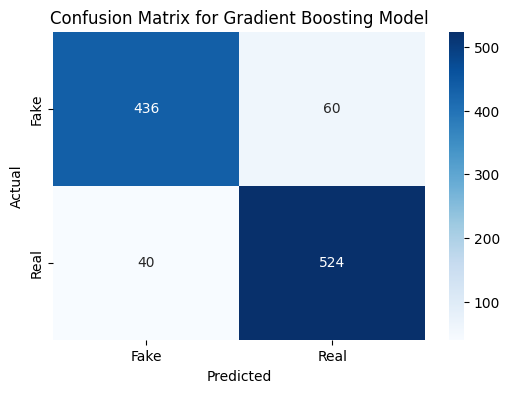

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()
